## hay varias variables en tu dataset que podrían ser interesantes para el análisis estadístico:

--imdb_rating: Tipo: Continua (calificaciones en decimales). Tabla de distribución de frecuencias: Crear clases (intervalos de calificaciones) y calcular frecuencias absolutas, relativas y acumuladas para analizar la distribución de las calificaciones.

--imdb_votes: Representa el número de votos en IMDb para cada episodio. Esta variable es discreta, ya que los votos solo pueden ser números enteros. Podrías analizar su distribución para ver si algunos episodios han recibido significativamente más votos que otros.

--us_viewers_in_millions: Muestra el número de espectadores en millones en EE. UU. También es una variable continua y podría ser interesante para entender cómo ha variado la audiencia a lo largo de los episodios. Podrías calcular medidas de tendencia central, dispersión, e intervalos de confianza para esta variable.

--season: Indica la temporada a la que pertenece cada episodio. Esta variable es categórica pero se puede tratar como discreta si quieres analizar la cantidad de episodios por temporada o la variación de la audiencia o la calificación media por temporada.

--views: Aunque no está claro de inmediato qué representa esta columna, si es la cantidad de veces que un episodio ha sido visto en otra plataforma, también podría usarse para explorar la popularidad relativa de los episodios.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
os.chdir(r"C:\Users\Martina\Documents\TUP\Estadistica y Probabilidad\TPI")
os.getcwd()

'C:\\Users\\Martina\\Documents\\TUP\\Estadistica y Probabilidad\\TPI'

In [3]:
# Carga el archivo CSV en un dataframe de Pandas
df = pd.read_csv('data\simpsons_episodes.csv')
# Imprime el dataframe
print(df)

      id                                          image_url  imdb_rating  \
0     10  http://static-media.fxx.com/img/FX_Networks_-_...          7.4   
1     12  http://static-media.fxx.com/img/FX_Networks_-_...          8.3   
2     14  http://static-media.fxx.com/img/FX_Networks_-_...          8.2   
3     17  http://static-media.fxx.com/img/FX_Networks_-_...          8.1   
4     19  http://static-media.fxx.com/img/FX_Networks_-_...          8.0   
..   ...                                                ...          ...   
595  500  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   
596  502  http://static-media.fxx.com/img/FX_Networks_-_...          7.3   
597  511  http://static-media.fxx.com/img/FX_Networks_-_...          6.9   
598  542  http://static-media.fxx.com/img/FX_Networks_-_...          6.4   
599  548  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   

     imdb_votes  number_in_season  number_in_series original_air_date  \
0        1511.

In [4]:
# Función para calcular medidas de tendencia central
def calcular_medidas_tendencia_central(serie):
    media = serie.mean()       # Media aritmética
    mediana = serie.median()   # Mediana
    moda = serie.mode()        # Moda (puede haber más de una moda)
    return media, mediana, moda

In [5]:
# Función para calcular medidas de dispersión
def calcular_medidas_dispersion(serie):
    rango = serie.max() - serie.min()  # Rango
    varianza = serie.var()             # Varianza
    desviacion_estandar = serie.std()  # Desviación estándar
    return rango, varianza, desviacion_estandar

         Clase  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0   4.5 - 4.97                    1             0.001675                     1
1  4.97 - 5.44                    1             0.001675                     2
2  5.44 - 5.91                    8             0.013400                    10
3  5.91 - 6.38                   24             0.040201                    34
4  6.38 - 6.85                  100             0.167504                   134
5  6.85 - 7.32                  211             0.353434                   345
6  7.32 - 7.79                   67             0.112228                   412
7  7.79 - 8.26                  102             0.170854                   514
8  8.26 - 8.73                   60             0.100503                   574
9   8.73 - 9.2                   23             0.038526                   597
------------------------------------------
Medidas de tendencia central para ratings:
  Media: 7.38609715242881
  Mediana: 7.3
  Mo

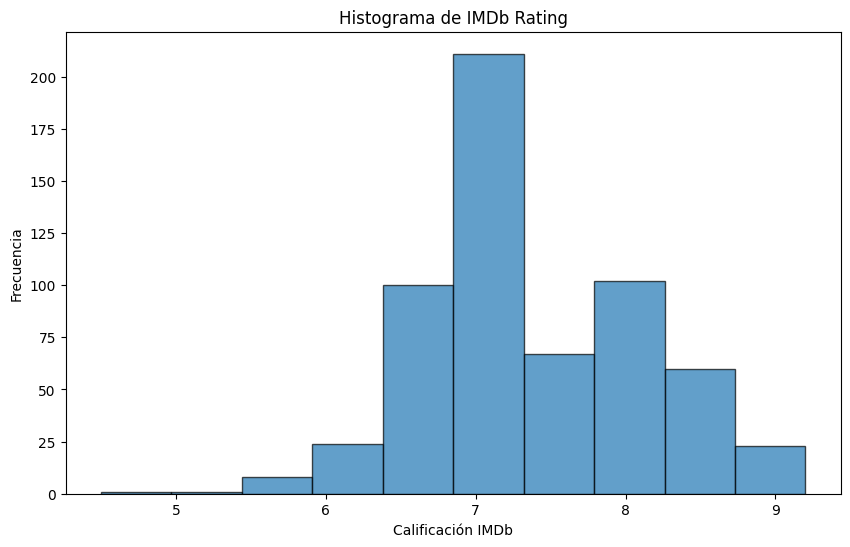

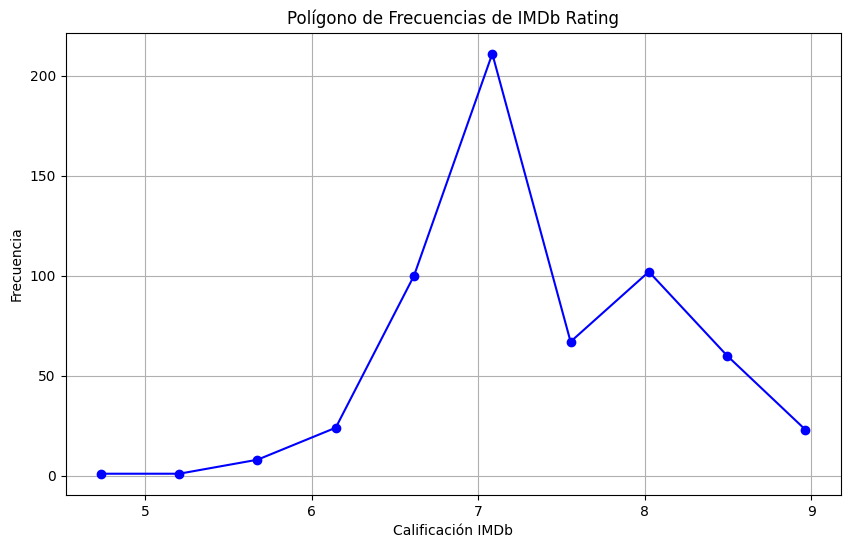

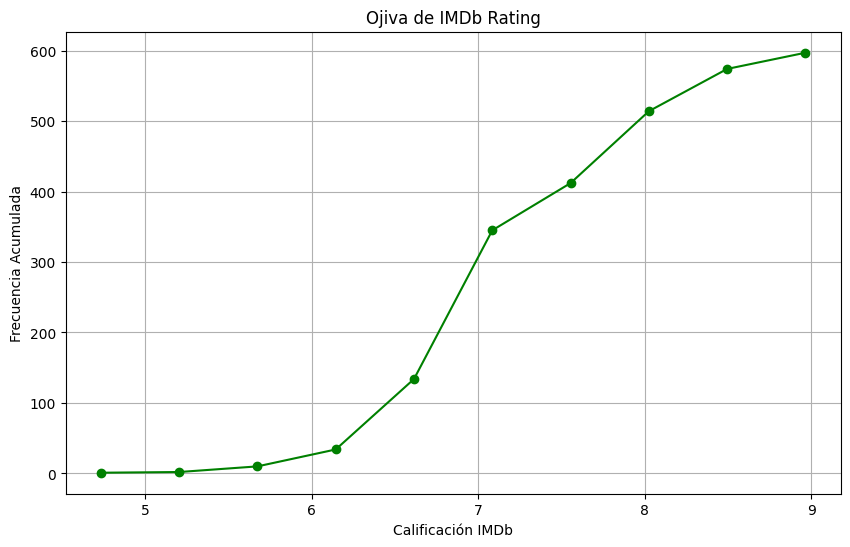

In [6]:
#TABLA DE DISTRIBUCIÓN DE FRECUENCIAS
#imb_rating es una variable continua
ratings = df['imdb_rating'].dropna()#borra las filas con valores nulos


# Define el número de clases usando la fórmula de Sturges
num_classes = int(1 + 3.322 * np.log10(len(ratings)))

# Crea el histograma para obtener las frecuencias
freq_abs, bins = np.histogram(ratings, bins=num_classes)
freq_rel = freq_abs / len(ratings)  # Frecuencia relativa
freq_cum = np.cumsum(freq_abs)       # Frecuencia acumulada


# Tabla de frecuencias
freq_table = pd.DataFrame({
    'Clase': [f"{round(bins[i], 2)} - {round(bins[i+1], 2)}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table)

print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(ratings)
print(f"Medidas de tendencia central para ratings:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(ratings)
print(f"Medidas de dispersión para ratings:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")


# Histograma
plt.figure(figsize=(10, 6))
plt.hist(ratings, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de IMDb Rating")
plt.xlabel("Calificación IMDb")
plt.ylabel("Frecuencia")
plt.show()

# Polígono de Frecuencias
# Calcula las frecuencias absolutas y los puntos medios de cada clase
freq_abs, bins = np.histogram(ratings, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de IMDb Rating")
plt.xlabel("Calificación IMDb")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Ojiva (Frecuencia Acumulada)
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de IMDb Rating")
plt.xlabel("Calificación IMDb")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()

## IMDb Rating (Calificación en IMDb)
--Medidas de tendencia central: La media muestra la calificación promedio que los episodios reciben en IMDb. Si la mediana es cercana a la media, la distribución de calificaciones es simétrica. Si hay una moda que difiere de la media, esto puede indicar que hay calificaciones frecuentes en un valor específico, como "7" o "8".

--Medidas de dispersión: El rango te dice la diferencia entre las calificaciones más altas y las más bajas. La desviación estándar indica cuánto varían las calificaciones alrededor de la media. Un valor bajo de desviación significa que las calificaciones son consistentes; un valor alto sugiere mayor variabilidad.
### Gráficos:
--Histograma: Permite ver la frecuencia de calificaciones en cada intervalo, indicando si hay más episodios con calificaciones altas o bajas.

--Polígono de frecuencias: Resalta la distribución de calificaciones de forma continua. Una forma simétrica sugiere una distribución normal, mientras que una asimetría indica una mayor concentración de calificaciones altas o bajas.

--Ojiva: La ojiva muestra cómo se acumulan las calificaciones, permitiendo ver si la mayoría de episodios se encuentran en calificaciones bajas o altas.

         Clase  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0    104 - 467                   72             0.120603                    72
1    467 - 830                  289             0.484087                   361
2   830 - 1193                  125             0.209380                   486
3  1193 - 1556                   77             0.128978                   563
4  1556 - 1919                   28             0.046901                   591
5  1919 - 2282                    4             0.006700                   595
6  2282 - 2645                    1             0.001675                   596
7  2645 - 3008                    0             0.000000                   596
8  3008 - 3371                    0             0.000000                   596
9  3371 - 3734                    1             0.001675                   597
------------------------------------------
Medidas de tendencia central para votes:
  Media: 832.3651591289782
  Mediana: 697.0
  M

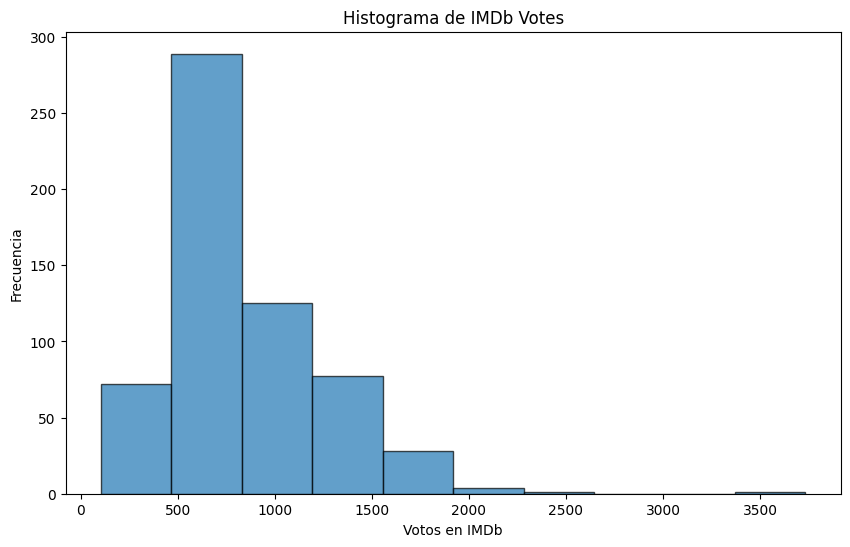

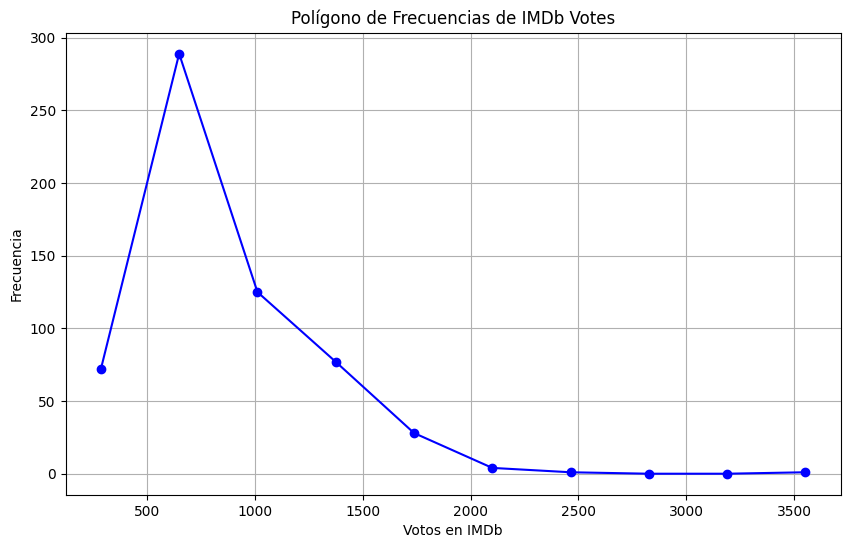

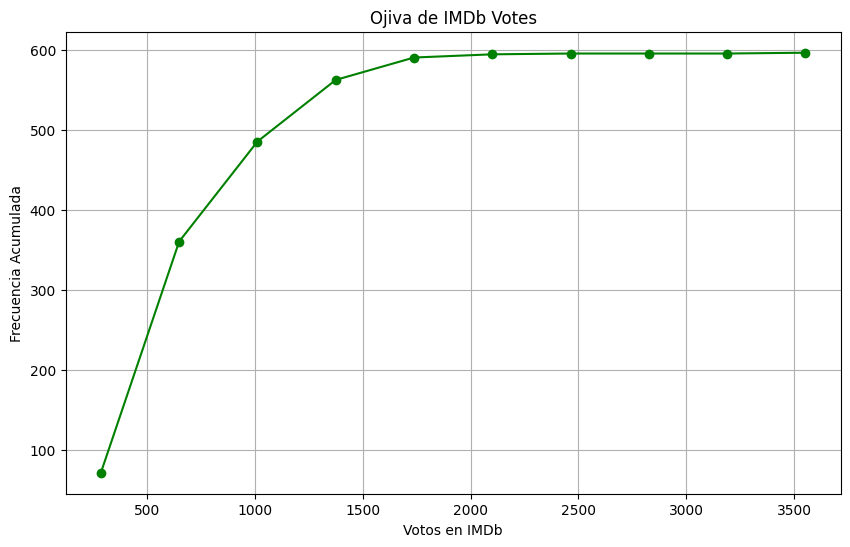

In [7]:
votes = df['imdb_votes'].dropna()


# Define el número de clases usando la fórmula de Sturges
num_classes = int(1 + 3.322 * np.log10(len(votes)))

# Crea el histograma para obtener las frecuencias
freq_abs, bins = np.histogram(votes, bins=num_classes)
freq_rel = freq_abs / len(votes)  # Frecuencia relativa
freq_cum = np.cumsum(freq_abs)     # Frecuencia acumulada

# Tabla de frecuencias
freq_table_votes = pd.DataFrame({
    'Clase': [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table_votes)
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(votes)
print(f"Medidas de tendencia central para votes:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(votes)
print(f"Medidas de dispersión para votes:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(votes, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de IMDb Votes")
plt.xlabel("Votos en IMDb")
plt.ylabel("Frecuencia")
plt.show()

# Polígono de Frecuencias
# Calcula las frecuencias absolutas y los puntos medios de cada clase
freq_abs, bins = np.histogram(votes, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de IMDb Votes")
plt.xlabel("Votos en IMDb")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Ojiva (Frecuencia Acumulada)
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de IMDb Votes")
plt.xlabel("Votos en IMDb")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()

## IMDb Votes (Votos en IMDb)
--Medidas de tendencia central: La media indica el número promedio de votos que recibe cada episodio. Si la mediana es menor que la media, indica que hay episodios con una cantidad de votos mucho mayor al promedio, lo que podría ser causado por episodios especialmente populares.

--Medidas de dispersión: Un rango amplio y una alta desviación estándar sugieren que algunos episodios son mucho más populares que otros, generando una mayor dispersión en los datos de votos.
### Gráficos:
--Histograma: Muestra la frecuencia de episodios por cantidad de votos, lo cual puede revelar si hay una mayoría de episodios con pocos votos y pocos episodios con muchos votos.

--Polígono de frecuencias: Te permite ver si hay una tendencia específica en los votos, como una concentración en ciertos intervalos.

--Ojiva: Una ojiva de pendiente más pronunciada en los valores bajos indica que la mayoría de episodios tiene una cantidad de votos baja.

           Clase  Frecuencia Absoluta  Frecuencia Relativa  \
0    2.32 - 5.45                   80             0.134680   
1    5.45 - 8.58                  143             0.240741   
2    8.58 - 11.7                  126             0.212121   
3   11.7 - 14.83                   81             0.136364   
4  14.83 - 17.96                   60             0.101010   
5  17.96 - 21.09                   40             0.067340   
6  21.09 - 24.22                   31             0.052189   
7  24.22 - 27.34                   21             0.035354   
8  27.34 - 30.47                    9             0.015152   
9   30.47 - 33.6                    3             0.005051   

   Frecuencia Acumulada  
0                    80  
1                   223  
2                   349  
3                   430  
4                   490  
5                   530  
6                   561  
7                   582  
8                   591  
9                   594  
-------------------------------

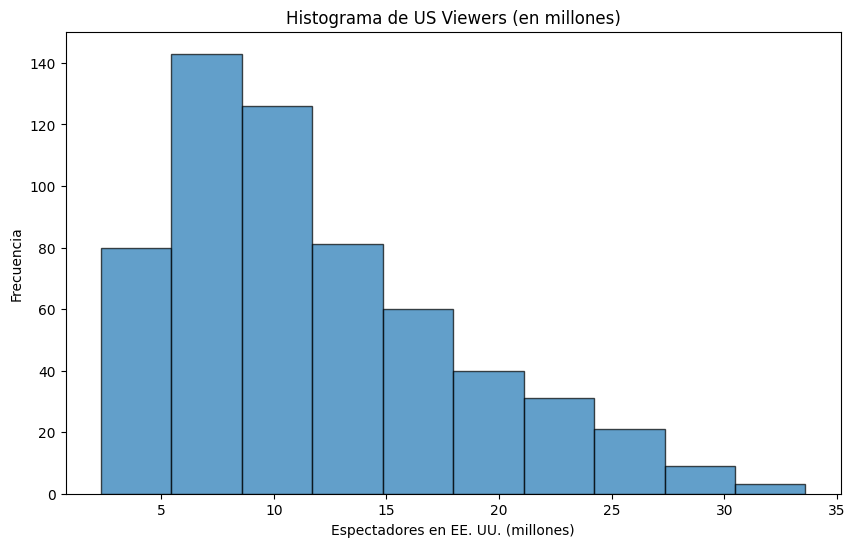

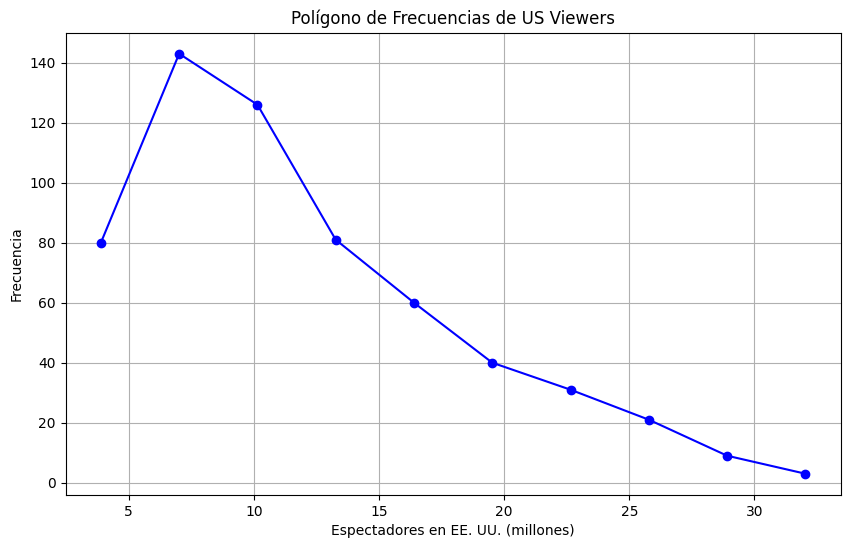

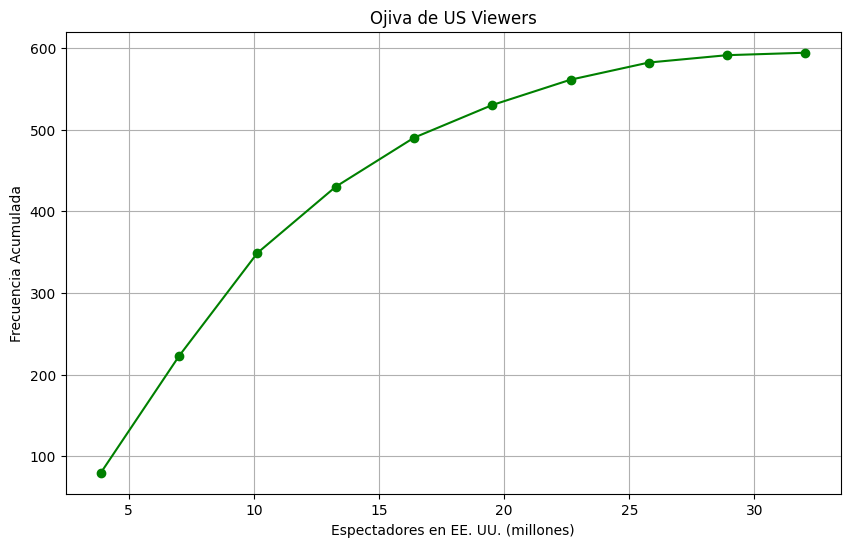

In [8]:
viewers = df['us_viewers_in_millions'].dropna()

# Define el número de clases usando la fórmula de Sturges
num_classes = int(1 + 3.322 * np.log10(len(viewers)))

# Crea el histograma para obtener las frecuencias
freq_abs, bins = np.histogram(viewers, bins=num_classes)
freq_rel = freq_abs / len(viewers)  # Frecuencia relativa
freq_cum = np.cumsum(freq_abs)       # Frecuencia acumulada

# Tabla de frecuencias
freq_table_viewers = pd.DataFrame({
    'Clase': [f"{round(bins[i], 2)} - {round(bins[i+1], 2)}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table_viewers)
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(viewers)
print(f"Medidas de tendencia central para viewers:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(viewers)
print(f"Medidas de dispersión para viewers:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")


# Histograma
plt.figure(figsize=(10, 6))
plt.hist(viewers, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de US Viewers (en millones)")
plt.xlabel("Espectadores en EE. UU. (millones)")
plt.ylabel("Frecuencia")
plt.show()

# Polígono de Frecuencias
# Calcula las frecuencias absolutas y los puntos medios de cada clase
freq_abs, bins = np.histogram(viewers, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de US Viewers")
plt.xlabel("Espectadores en EE. UU. (millones)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Ojiva (Frecuencia Acumulada)
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de US Viewers")
plt.xlabel("Espectadores en EE. UU. (millones)")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()

In [12]:
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(viewers)
print(f"Medidas de tendencia central para viewers:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad
print("------------------------------------------")

------------------------------------------
Medidas de tendencia central para viewers:
  Media: 11.842794612794613
  Mediana: 10.3
  Moda: [14.4]

------------------------------------------


## US Viewers in Millions (Audiencia en EE.UU. en millones)
--Medidas de tendencia central: La media te dice la audiencia promedio por episodio en millones de espectadores. La mediana cercana a la media indica una distribución balanceada, mientras que una diferencia significativa sugiere episodios extremadamente populares.

--Medidas de dispersión: Un rango amplio y una alta desviación estándar indican variabilidad en la audiencia. Es posible que los episodios de temporadas más recientes tengan menos espectadores, lo que explicaría una distribución asimétrica.
### Gráficos:
--Histograma: Muestra cuántos episodios alcanzaron cierto nivel de audiencia, indicando la popularidad relativa.

--Polígono de frecuencias: Permite observar la tendencia de la audiencia de manera continua.

--Ojiva: Puede mostrar si una mayoría de episodios tienen una audiencia baja, mientras que solo unos pocos lograron una gran audiencia.

    Temporada  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0           1                   13             0.021667                    13
1           2                   22             0.036667                    35
2           3                   24             0.040000                    59
3           4                   22             0.036667                    81
4           5                   22             0.036667                   103
5           6                   25             0.041667                   128
6           7                   25             0.041667                   153
7           8                   25             0.041667                   178
8           9                   25             0.041667                   203
9          10                   23             0.038333                   226
10         11                   22             0.036667                   248
11         12                   21             0.035000         

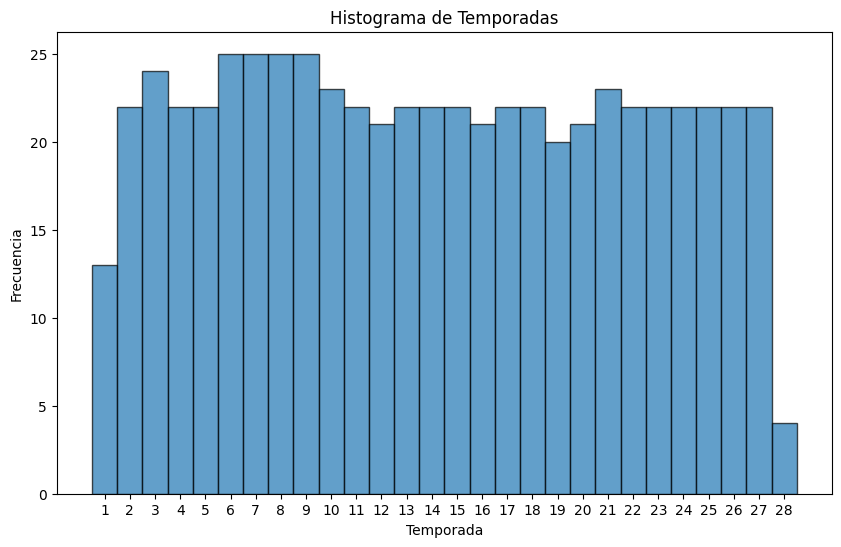

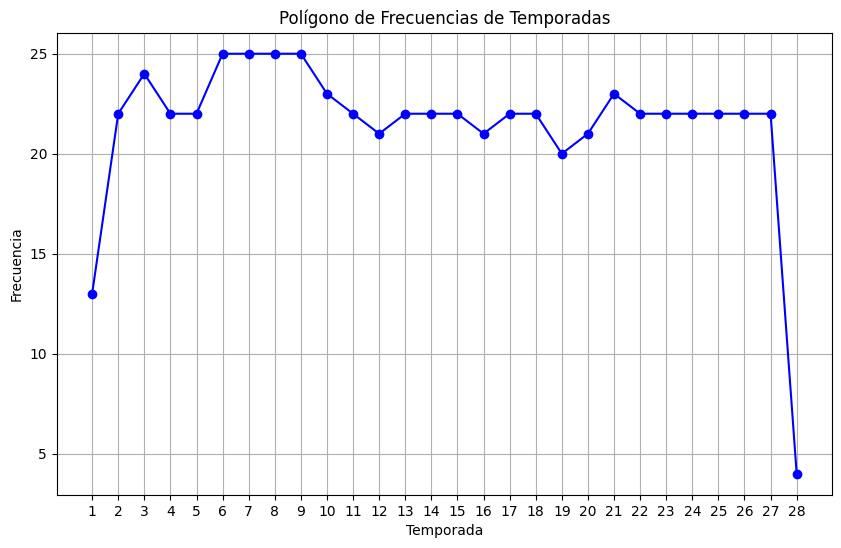

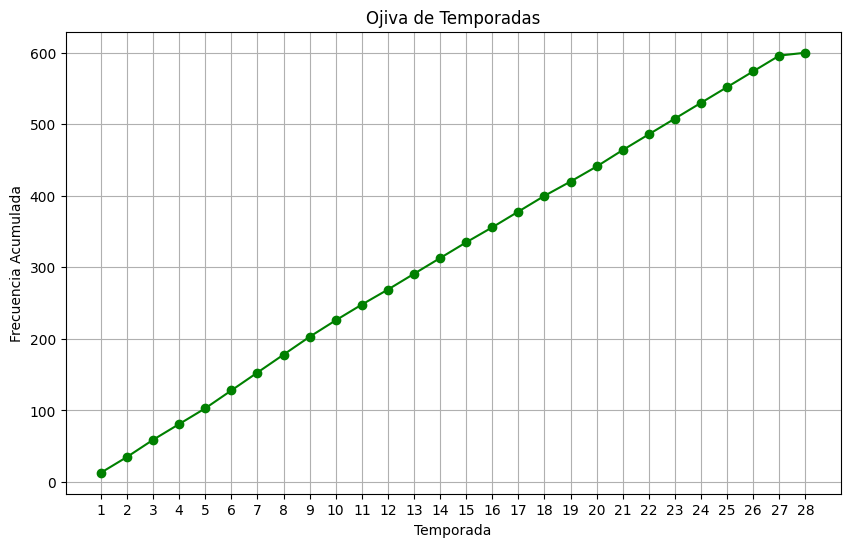

In [9]:
seasons = df['season'].dropna()

# Frecuencia absoluta: Cuenta el número de episodios por temporada
freq_abs = seasons.value_counts().sort_index()

# Frecuencia relativa: Proporción de episodios en cada temporada
freq_rel = freq_abs / len(seasons)

# Frecuencia acumulada
freq_cum = freq_abs.cumsum()

# Tabla de frecuencias
freq_table_season = pd.DataFrame({
    'Temporada': freq_abs.index,
    'Frecuencia Absoluta': freq_abs.values,
    'Frecuencia Relativa': freq_rel.values,
    'Frecuencia Acumulada': freq_cum.values
})

print(freq_table_season)
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(seasons)
print(f"Medidas de tendencia central para seasons:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(seasons)
print(f"Medidas de dispersión para seasons:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(seasons, bins=range(int(seasons.min()), int(seasons.max()) + 2), edgecolor='black', alpha=0.7, align='left')
plt.title("Histograma de Temporadas")
plt.xlabel("Temporada")
plt.ylabel("Frecuencia")
plt.xticks(range(int(seasons.min()), int(seasons.max()) + 1))  # Etiquetas para cada temporada
plt.show()

# Polígono de Frecuencias
freq_abs = seasons.value_counts().sort_index()  # Cuenta la frecuencia de cada temporada y ordena
temporadas = freq_abs.index

plt.figure(figsize=(10, 6))
plt.plot(temporadas, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de Temporadas")
plt.xlabel("Temporada")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.xticks(temporadas)  # Etiquetas para cada temporada
plt.show()

# Ojiva (Frecuencia Acumulada)
freq_cum = freq_abs.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(temporadas, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de Temporadas")
plt.xlabel("Temporada")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.xticks(temporadas)  # Etiquetas para cada temporada
plt.show()


## Season (Temporada)
--Medidas de tendencia central: Aquí, la media y mediana representan la temporada promedio. Dado que la moda sería la temporada con mayor cantidad de episodios, esto puede reflejar cambios en la cantidad de episodios producidos por temporada.

--Medidas de dispersión: La varianza y desviación estándar no son tan significativas aquí, ya que el número de temporada simplemente ordena a los episodios.
### Gráficos:
--Histograma: Muestra la cantidad de episodios por temporada, indicando si hay temporadas con más producción.

--Polígono de frecuencias: Puede revelar tendencias, como un aumento o disminución en el número de episodios a lo largo de las temporadas.

--Ojiva: Muestra la frecuencia acumulada de episodios por temporada, lo cual ayuda a observar cómo ha crecido la serie en episodios a lo largo de los años.

In [10]:
views = df['views'].dropna()

# Define el número de clases usando la fórmula de Sturges
num_classes = int(1 + 3.322 * np.log10(len(views)))

# Crea el histograma para obtener las frecuencias
freq_abs, bins = np.histogram(views, bins=num_classes)
freq_rel = freq_abs / len(views)  # Frecuencia relativa
freq_cum = np.cumsum(freq_abs)     # Frecuencia acumulada

# Tabla de frecuencias
freq_table_views = pd.DataFrame({
    'Clase': [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table_views)
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(views)
print(f"Medidas de tendencia central para views:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad



             Clase  Frecuencia Absoluta  Frecuencia Relativa  \
0      144 - 17270                   25             0.041946   
1    17270 - 34396                   27             0.045302   
2    34396 - 51523                  336             0.563758   
3    51523 - 68649                  145             0.243289   
4    68649 - 85776                   52             0.087248   
5   85776 - 102902                    4             0.006711   
6  102902 - 120028                    5             0.008389   
7  120028 - 137155                    1             0.001678   
8  137155 - 154281                    0             0.000000   
9  154281 - 171408                    1             0.001678   

   Frecuencia Acumulada  
0                    25  
1                    52  
2                   388  
3                   533  
4                   585  
5                   589  
6                   594  
7                   595  
8                   595  
9                   596  
---------

------------------------------------------
Medidas de dispersión para views:
  Rango: 171264.0
  Varianza: 315108952.1748887
  Desviación Estándar: 17751.308463741163



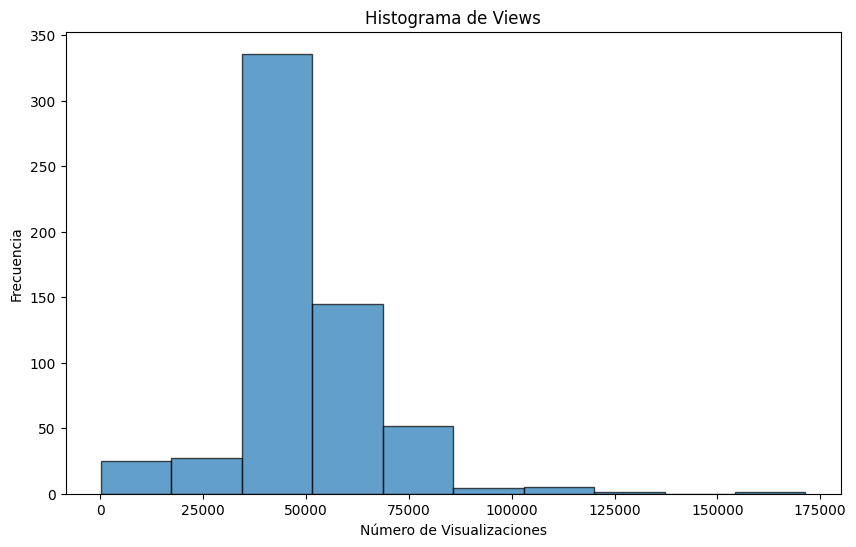

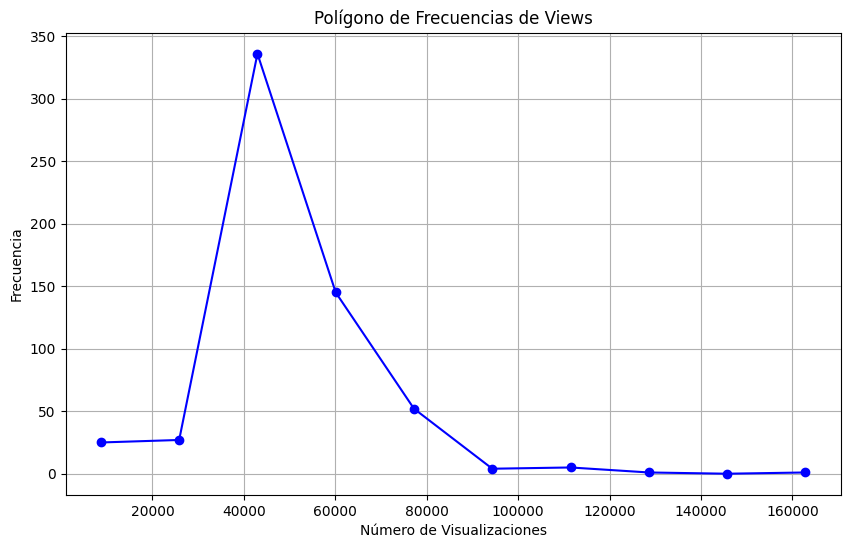

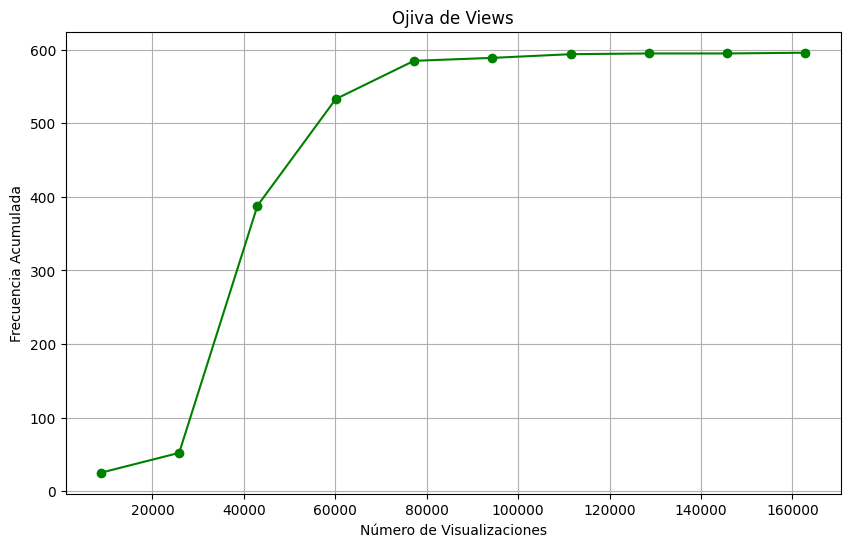

In [11]:
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(views)
print(f"Medidas de dispersión para views:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")


# Histograma
plt.figure(figsize=(10, 6))
plt.hist(views, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de Views")
plt.xlabel("Número de Visualizaciones")
plt.ylabel("Frecuencia")
plt.show()

# Polígono de Frecuencias
# Calcula las frecuencias absolutas y los puntos medios de cada clase
freq_abs, bins = np.histogram(views, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de Views")
plt.xlabel("Número de Visualizaciones")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

# Ojiva (Frecuencia Acumulada)
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de Views")
plt.xlabel("Número de Visualizaciones")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()


## Views (Visualizaciones)
--Medidas de tendencia central: La media indica el promedio de visualizaciones de cada episodio. Si la moda es diferente de la media, podría indicar que hay un número común de visualizaciones que la mayoría de los episodios tiende a recibir.

--Medidas de dispersión: Un rango amplio o una alta desviación estándar indican que algunos episodios son mucho más vistos que otros.
### Gráficos:
--Histograma: Permite ver la frecuencia de episodios por cantidad de visualizaciones.

--Polígono de frecuencias: Proporciona una visualización continua de la distribución de visualizaciones.

--Ojiva: Muestra cuántos episodios están por debajo de ciertos niveles de visualización, útil para observar la acumulación de episodios con visualizaciones crecientes.
